##### Note: This document contains sections 2 and 3 of the work.

#### From previous section

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read csv file
final_df_ML = pd.read_csv('final_df_ML.csv')

# Separate the features (X) and the target (y)
# Features: 'Seq_Embedding' and 'Disease_Embedding'
# Target: 'Y'

X = final_df_ML[['Seq_Embedding', 'Disease_Embedding']]  
y = final_df_ML['Y']  

# Split into train + validation set and test set (80% train + validation, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the train + validation set into train and validation (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Display the shape of the datasets
print(f'Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}')

Train shape: (31485, 2), Validation shape: (10495, 2), Test shape: (10496, 2)


In [13]:
#Imports
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster
from scipy.spatial.distance import pdist, squareform

# Section 2: Unsupervised Learning

Unsupervised analysis involves identifying hidden patterns and structures within datasets without the need for predefined labels or categories. Unlike approaches where data is pre-labeled, this method allows algorithms to explore intrinsic relationships within the data, grouping them into categories or reducing dimensionality. It is useful for uncovering hidden insights from large volumes of data and generating automatic insights without external intervention.

Although **we are aware that unsupervised analysis on complex data such as those used in this study** — gene-disease associations with embeddings derived from amino acid sequences and textual descriptions of diseases — **does not allow for particularly meaningful conclusions**, we chose to conduct it nonetheless for academic purposes.

This effort aims to explore potential latent patterns or groupings that, while not immediately useful or conclusive, may provide preliminary insights into the data structure. Additionally, **we consider that this type of analysis contributes to a broader understanding of the data organization and offers an opportunity to discuss the limitations and challenges of applying unsupervised techniques in highly complex scenarios**.



### Dimensionality Reduction

Working with high-dimensional data can present a number of challenges, such as increased computational complexity, greater risk of overfitting and difficulty interpreting the results.
As such, dimensionality reduction is a fundamental technique in machine learning, especially in problems with high dimensionality, where the number of variables or features is very large. This approach seeks to simplify the data set, keeping as much relevant information as possible, while eliminating redundancies and noise.

### PCA

PCA is a dimensionality reduction technique that transforms a set of possibly correlated variables into a new set of uncorrelated variables called principal components. It does this by identifying directions in the data space that capture the greatest possible variance, ordering these directions by importance. In this way, PCA makes it possible to represent the data in a lower-dimensional space, preserving as much information as possible.

In [3]:
# Convert the strings to numeric arrays
X_train['Disease_Embedding'] = X_train['Disease_Embedding'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float)
)
X_train['Seq_Embedding'] = X_train['Seq_Embedding'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float)
)

X_val['Disease_Embedding'] = X_val['Disease_Embedding'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float)
)
X_val['Seq_Embedding'] = X_val['Seq_Embedding'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float)
)

X_test['Disease_Embedding'] = X_test['Disease_Embedding'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float)
)
X_test['Seq_Embedding'] = X_test['Seq_Embedding'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float)
)

# Concatenate the sequence and disease embeddings
X_train_embeddings = np.hstack([X_train['Seq_Embedding'].tolist(), X_train['Disease_Embedding'].tolist()])
X_val_embeddings = np.hstack([X_val['Seq_Embedding'].tolist(), X_val['Disease_Embedding'].tolist()])
X_test_embeddings = np.hstack([X_test['Seq_Embedding'].tolist(), X_test['Disease_Embedding'].tolist()])

# Check the shape of the concatenated feature matrix
print(f'Shape of the feature matrix before PCA: {X_train_embeddings.shape}')

Shape of the feature matrix before PCA: (31485, 868)


In [4]:
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the explained variance
X_train_pca = pca.fit_transform(X_train_embeddings)
X_val_pca = pca.transform(X_val_embeddings)
X_test_pca = pca.transform(X_test_embeddings)

# Display results
print(f'Number of principal components retained: {X_train_pca.shape[1]}')
print(f'Train PCA shape: {X_train_pca.shape}, Validation PCA shape: {X_val_pca.shape}, Test PCA shape: {X_test_pca.shape}')

Number of principal components retained: 181
Train PCA shape: (31485, 181), Validation PCA shape: (10495, 181), Test PCA shape: (10496, 181)


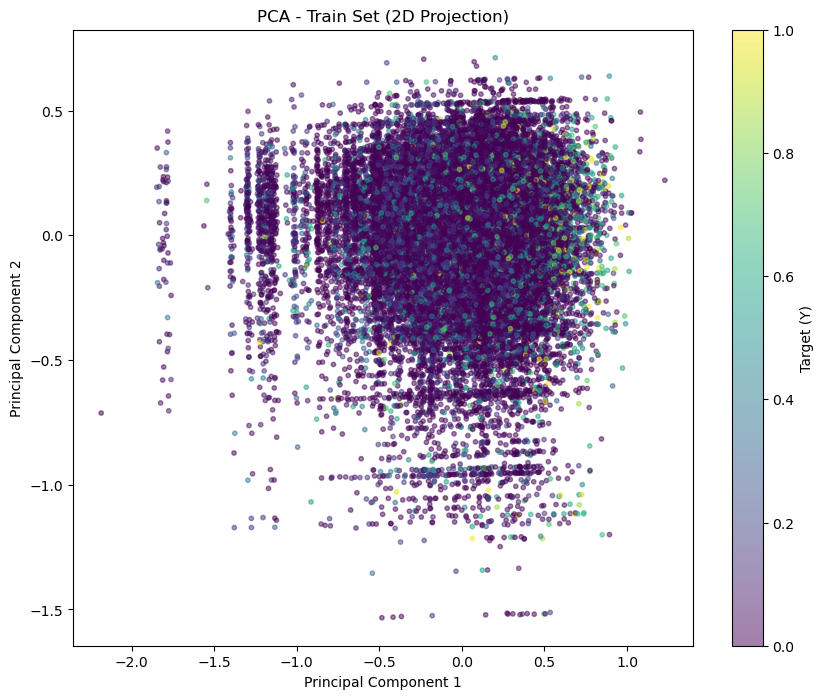

In [5]:
# Reduce to 2 principal components for visualization
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_embeddings)

# Plot 2D graph
plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, cmap='viridis', alpha=0.5, s=10)
plt.colorbar(label='Target (Y)')
plt.title('PCA - Train Set (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### **t-SNE (t-Distributed Stochastic Neighbor Embedding)**  

t-SNE is a dimensionality reduction algorithm for visualizing high-dimensional data in 2D or 3D. It preserves local relationships by converting pairwise distances into probabilities and optimizing a low-dimensional representation to match these probabilities.  

The process involves:  
1. **Initialization:** Compute pairwise similarities in high-dimensional space using a Gaussian distribution.  
2. **Optimization:** Minimize divergence between high- and low-dimensional distributions, emphasizing local patterns.  
3. **Projection:** Represent the data in 2D or 3D, revealing clusters and relationships.  

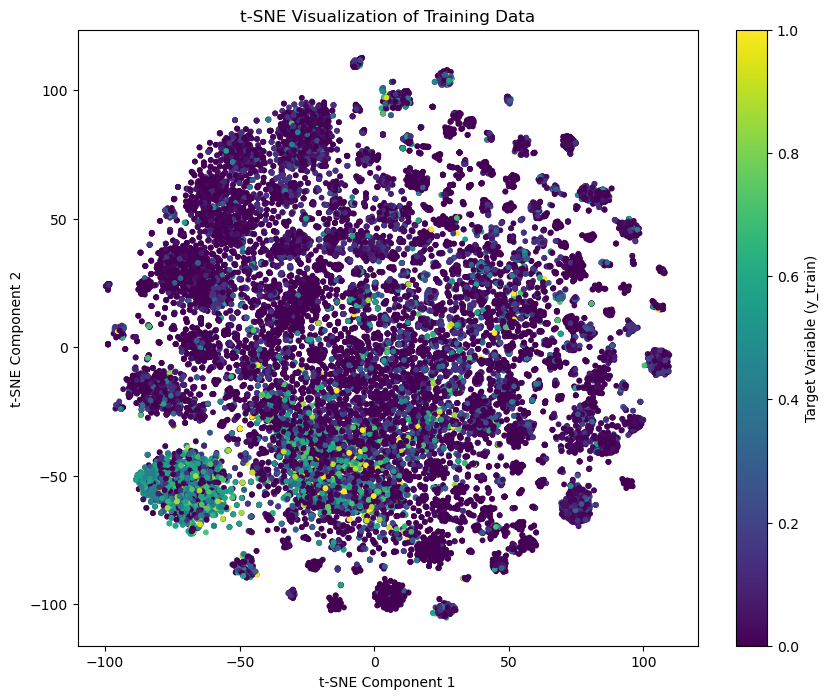

In [29]:
# Apply t-SNE on the PCA data
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_train_tsne = tsne.fit_transform(X_train_pca)

# Visualization of t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', s=10)
plt.colorbar(label='Target Variable (y_train)')
plt.title('t-SNE Visualization of Training Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

Despite using data with the dimensionality already reduced, it was only possible to obtain fuzzy groupings, i.e. the points appear less compactly distributed and with overlap between groups. This can happen for a number of reasons, ranging from the possible correlation of the input data, or the size of the dataset being insufficient. Even so, t-SNE proves to be a better visualization technique than PCA for our data.

However, by adjusting some hyperparameters such as Perplexity, it may be possible to achieve better results. This is because this parameter controls the balance between global and local sensitivity in t-SNE. Perplexities that are too high or too low can lead to less significant distributions. We then chose to use 3 different perplexity values [5, 30, 50] to see if it was possible to obtain clearer results.

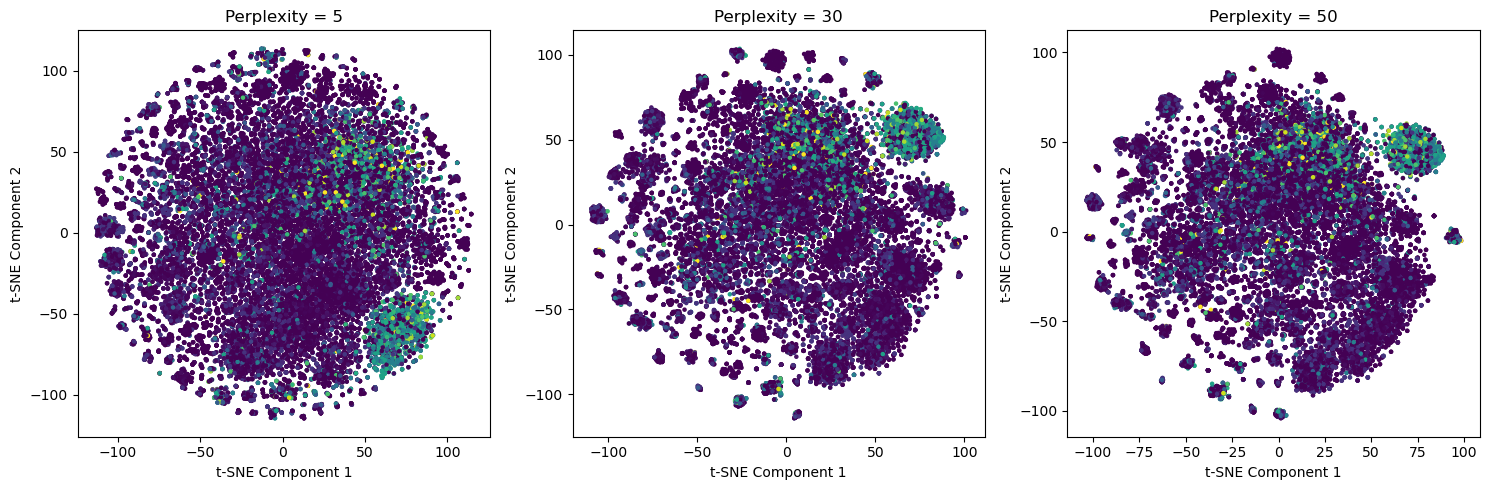

In [6]:
perplexities = [5, 30, 50]

plt.figure(figsize=(15, 5))
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(X_train_pca)
    
    plt.subplot(1, len(perplexities), i + 1)
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_train, cmap='viridis', s=5)
    plt.title(f'Perplexity = {perplexity}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

It can be seen that even with the modification of these hyperparameters, it was not possible to obtain a clear division of the groups.

### Clustering

Clustering is an unsupervised learning technique that identifies patterns and structure in data, grouping them into homogeneous clusters. It uses distance or similarity measures to group together nearby data points, seeking to maximize intra-cluster cohesion and inter-cluster separation. These clusters can reveal insights into the underlying structure of the data.
In this project, two clustering algorithms were addressed: **hierarchical clustering**, which builds a tree of clusters, where each node represents a cluster; **K-means**, which is a clustering algorithm that divides a data set into K clusters by minimizing the sum of the squares of the distances between the points and the centroids.

The module used for this analysis was **sklearn.cluster**

#### Hierarchical Clustering

To perform hierarchical clustering, we will follow these steps:

1. **Preprocessing**: Combine and normalize the "Disease_Embedding" and "vector" columns, which contain the numerical embeddings of disease and gene data, to create a feature matrix.  
2. **Distance Matrix Calculation**: Compute the distance matrix between the data points.  
3. **Applying Hierarchical Clustering Algorithm**: Use a hierarchical clustering method, such as SciPy's `linkage`.  
4. **Dendrogram Visualization**: Visualize the clustering results using a dendrogram.  

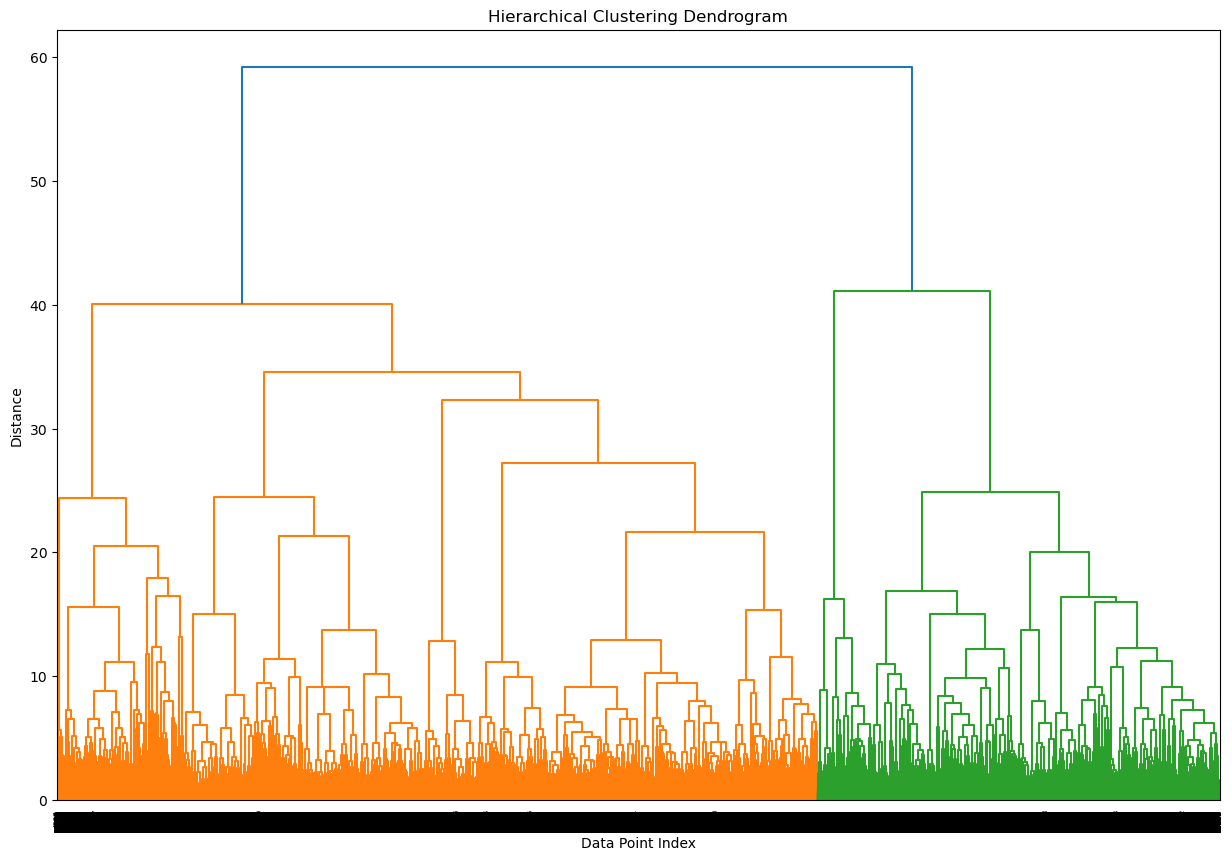

In [11]:
distance_matrix = pdist(X_train_pca)

Z = linkage(distance_matrix, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()

It is possible to see in the dendogram below that there are several small and very specific clusters. This could mean that there is a lot of noise in the data, high dimensionality despite the previous application of PCA, or inadequate adjustment of the ‘Linkage’ method. If the linkage method is not well adjusted to the data, the algorithm may over-divide the clusters into small branches. 

So we decided to try an approach in which we previously defined the number of clusters (20) to be displayed by the algorithm. This can be useful in interpreting the data due to clearer visualisation and also to avoid overfitting, i.e. so that the model doesn't make clusters that are too small and don't add value.

C:\Users\carla\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


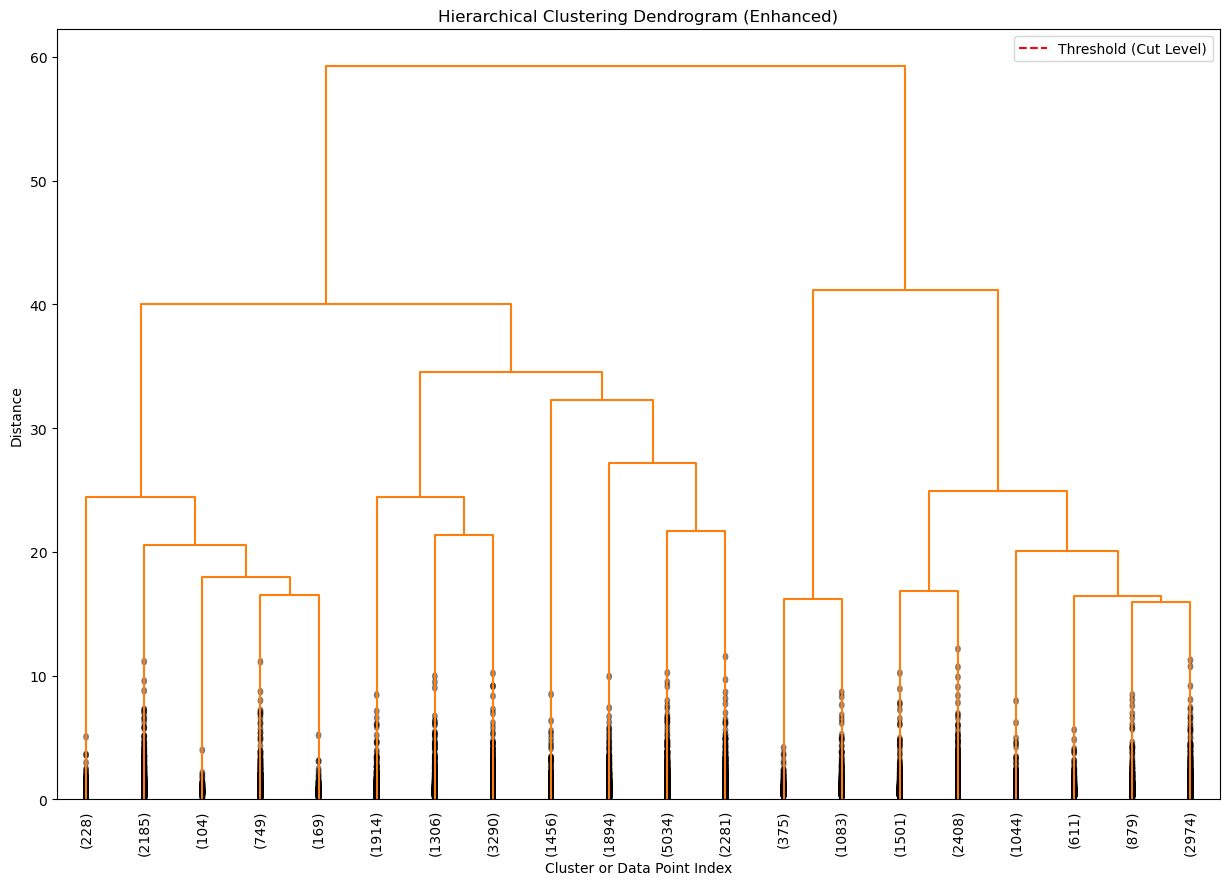

In [12]:
num_clusters = 20
clusters = fcluster(Z, num_clusters, criterion='maxclust')

plt.figure(figsize=(15, 10))
dendrogram(
    Z,
    truncate_mode='lastp',  # Display only the last 'p' clusters
    p=num_clusters,         # Number of clusters to display
    leaf_rotation=90.,      # Rotation of the labels on the X axis
    leaf_font_size=10.,     # Font size for the labels
    show_contracted=True,   # Show contracted nodes
    color_threshold=1500    # Set a threshold to color clusters
)
plt.title('Hierarchical Clustering Dendrogram (Enhanced)')
plt.xlabel('Cluster or Data Point Index')
plt.ylabel('Distance')

# Add a horizontal line to indicate the cluster cut-off
plt.axhline(y=1500, color='r', linestyle='--', label='Threshold (Cut Level)')
plt.legend()

plt.show()

Although it's not possible to get much information from the fixed number of clusters, the previous graph gave a clearer visualisation of some of the possible clusters in the data.

#### Clustering K-Means

K-means is an unsupervised clustering algorithm widely used to group data into distinct clusters. The goal of K-means is to divide a dataset into K clusters in such a way that the data within the same cluster are as homogeneous as possible, while the data in different clusters are as distinct as possible.

The operation of K-means is based on the idea that the data can be represented by centroids, or central points, and that the distance between the data and its corresponding centroid should be minimized. The algorithm achieves this through an iterative process that follows three main steps:

- Initialization: The algorithm starts with the random selection of K central points (centroids) that will serve as the initial centers of the clusters. In this case, the number of clusters K is determined using the **elbow - method**, which helps identify the optimal number of clusters by analyzing the point where the reduction in inertia (sum of squared distances) begins to slow down.

- Assignment: Each data point is assigned to the nearest center, meaning each point is assigned to the cluster whose centroid is closest, based on a distance metric such as Euclidean distance.

- Update: After assigning the points to the clusters, the algorithm recalculates the position of the centroids as the average of the points belonging to each cluster.

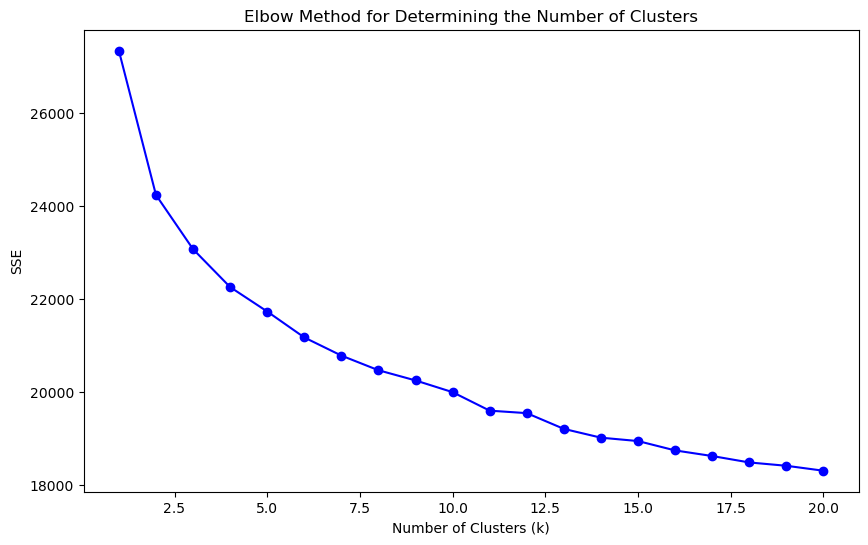

In [14]:
sse = []
k_range = range(1, 21)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Determining the Number of Clusters')
plt.show()

Analysing the chart, you can see that there is no well-defined ‘elbow’. As with the previous methods, this may once again mean that the data does not have well-defined groups, which means that there is no clear inflection point. This is because the SSE gradually decreases as more clusters are added.

________________________________________________________________________________________

# Section 3: Supervised Learning- Machine Learning (ML)

Supervised learning is a type of machine learning where **a model is trained using a labeled dataset**, meaning that the inputs (features) are associated with known outputs or labels. The goal is to train the model to learn the mapping between inputs and their corresponding outputs, so that when exposed to new, unseen data, it can accurately predict or classify. This approach is commonly used in tasks such as classification (where the outputs are categories) and regression (where the outputs are continuous values). During training, the model's parameters are adjusted to minimize the difference between its predictions and the actual output values, typically using optimization techniques.

Machine Learning is a subset of artificial intelligence (AI) that focuses on building systems that learn from data and improve over time without being explicitly programmed. In ML, algorithms identify patterns in data and use those patterns to make predictions or decisions.

In the Machine Learning task, **we tested several approaches**, with a particular focus on data selection as well as hyperparameter optimization. Specifically, we evaluated the **impact of using non-reduced data versus data reduced through PCA**, and also **compared the performance of models with and without optimization techniques**.

Although the generation of embeddings already provides a vectorized and reduced representation of the original data, we decided to investigate whether the additional application of PCA would improve or degrade the performance of the models. This analysis is based on the hypothesis that the data might still contain redundancies or noise that could lead to overfitting. However, it is expected that models using directly concatenated embeddings will perform better due to preserving richer informational content.

As mentioned, we are dealing with a regression problem. Therefore, **we experimented with algorithms ranging from simpler ones**, such as Linear Regression and Ridge Regression, **to more complex ones**, such as Decision Trees, Random Forests, and SVR, which are capable of capturing non-linear relationships in the data. Given the complexity of our data, it is expected that the second group of models will perform better.

To evaluate the results, we used two main metrics: the **mean squared error (MSE)** and the **coefficient of determination ($R^2$)**. The MSE measures the average squared error between the predicted and actual values, with values closer to zero indicating higher precision. The coefficient of determination evaluates the proportion of the variability in the data that is explained by the model; the closer this value is to 1, the greater the model's explanatory power.

**Note:** The reproducibility of the results is ensured by setting the **random_state=42** in all models and cross-validation steps. This ensures that the random processes (such as data shuffling and the initialization of model parameters) are consistent across different runs, making the results replicable.

### Brief description of the models

The following table provides a comparative overview of the regression models used in this poject. It highlights key characteristics of each model, including their ability to capture non-linear relationships and the regularization methods employed. Understanding these features helps to evaluate the strengths and weaknesses of each model in the context of our dataset. The models compared here are commonly used in machine learning tasks and vary in their complexity and approach to solving regression problems. [1] [2] [3] [4] [5]

In [17]:
# Set pandas to display the entire content of the cells without truncation
pd.set_option('display.max_colwidth', None)  # None removes the truncation for column content

# Data for the table
data = {
    "Model": ["Linear Regression", "Ridge Regression", "Decision Tree", "Random Forest", "SVR (Support Vector Regression)"],
    "Model Type": ["Linear Regression", "Regularized Linear Regression", "Decision Tree", "Ensemble of Decision Trees", "Support Vector Regression"],
    "Key Parameter": ["None (only intercept)", "Alpha (L2 regularization)", "Max depth, min samples per leaf", "Number of estimators, max depth", "C (regularization), epsilon (tolerance)"],
    "Ability to Capture Non-Linear Relationships": ["No", "No", "Yes (captures non-linearity by recursively splitting the data)", "Yes (ensemble of decision trees captures complex relationships)", "Yes (captures non-linear relationships using kernels)"],
    "Regularization": ["No", "Yes (L2)", "No", "No", "Yes (L2)"]
}

# Create the DataFrame
df = pd.DataFrame(data)
df

,Model,Model Type,Key Parameter,Ability to Capture Non-Linear Relationships,Regularization
0,Linear Regression,Linear Regression,None (only intercept),No,No
1,Ridge Regression,Regularized Linear Regression,Alpha (L2 regularization),No,Yes (L2)
2,Decision Tree,Decision Tree,"Max depth, min samples per leaf",Yes (captures non-linearity by recursively splitting the data),No
3,Random Forest,Ensemble of Decision Trees,"Number of estimators, max depth",Yes (ensemble of decision trees captures complex relationships),No
4,SVR (Support Vector Regression),Support Vector Regression,"C (regularization), epsilon (tolerance)",Yes (captures non-linear relationships using kernels),Yes (L2)


In [3]:
#imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

### Training the models using PCA-reduced data

In [11]:
# Create the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=0.001, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf')
}

# Loop to train and evaluate each model
for model_name, model in models.items():
    print(f"Training the {model_name} model...")

    # Train the model with the training data
    model.fit(X_train_pca, y_train)

    # Make predictions on the validation set
    y_val_pred = model.predict(X_val_pca)

    # Evaluate the model on the validation set
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # Make predictions on the test set
    y_test_pred = model.predict(X_test_pca)

    # Evaluate the model on the test set
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print the results
    print(f"{model_name} - Validation Set: MSE = {val_mse:.4f}, R-squared = {val_r2:.4f}")
    print(f"{model_name} - Test Set: MSE = {test_mse:.4f}, R-squared = {test_r2:.4f}")
    print("-" * 50)


Training the Linear Regression model...
Linear Regression - Validation Set: MSE = 0.0273, R-squared = 0.2366
Linear Regression - Test Set: MSE = 0.0277, R-squared = 0.2288
--------------------------------------------------
Training the Ridge Regression model...
Ridge Regression - Validation Set: MSE = 0.0273, R-squared = 0.2366
Ridge Regression - Test Set: MSE = 0.0277, R-squared = 0.2288
--------------------------------------------------
Training the Decision Tree model...
Decision Tree - Validation Set: MSE = 0.0559, R-squared = -0.5652
Decision Tree - Test Set: MSE = 0.0560, R-squared = -0.5610
--------------------------------------------------
Training the Random Forest model...
Random Forest - Validation Set: MSE = 0.0261, R-squared = 0.2683
Random Forest - Test Set: MSE = 0.0260, R-squared = 0.2739
--------------------------------------------------
Training the SVR model...
SVR - Validation Set: MSE = 0.0259, R-squared = 0.2753
SVR - Test Set: MSE = 0.0257, R-squared = 0.2842
---

### Training the models using original data (embeddings)

In [18]:
# Create the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=0.001, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf')
}

# Loop to train and evaluate each model
for model_name, model in models.items():
    print(f"Training the {model_name} model...")

    # Train the model with the training data
    model.fit(X_train_embeddings, y_train)

    # Make predictions on the validation set
    y_val_pred = model.predict(X_val_embeddings)

    # Evaluate the model on the validation set
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # Make predictions on the test set
    y_test_pred = model.predict(X_test_embeddings)

    # Evaluate the model on the test set
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print the results
    print(f"{model_name} - Validation Set: MSE = {val_mse:.4f}, R-squared = {val_r2:.4f}")
    print(f"{model_name} - Test Set: MSE = {test_mse:.4f}, R-squared = {test_r2:.4f}")
    print("-" * 50)

Training the Linear Regression model...
Linear Regression - Validation Set: MSE = 0.0254, R-squared = 0.2875
Linear Regression - Test Set: MSE = 0.0249, R-squared = 0.3063
--------------------------------------------------
Training the Ridge Regression model...
Ridge Regression - Validation Set: MSE = 0.0254, R-squared = 0.2876
Ridge Regression - Test Set: MSE = 0.0249, R-squared = 0.3064
--------------------------------------------------
Training the Decision Tree model...
Decision Tree - Validation Set: MSE = 0.0474, R-squared = -0.3271
Decision Tree - Test Set: MSE = 0.0444, R-squared = -0.2387
--------------------------------------------------
Training the Random Forest model...
Random Forest - Validation Set: MSE = 0.0237, R-squared = 0.3376
Random Forest - Test Set: MSE = 0.0232, R-squared = 0.3534
--------------------------------------------------
Training the SVR model...
SVR - Validation Set: MSE = 0.0280, R-squared = 0.2152
SVR - Test Set: MSE = 0.0282, R-squared = 0.2131
---

### Training the models using original data (embeddings) and hyperparameter optimization with RandomizedSearchCV

#### Rdige Regression and Decision Tree

In [10]:
# Define the parameter spaces for hyperparameter tuning

# Ridge Regression
param_dist_ridge = {
    'alpha': np.logspace(-5, 5, 11)  
}

# Decision Tree
param_dist_dt = {
    'max_depth': [None, 5, 10, 20, 30, 50],           
   'min_samples_split': [2, 5, 10, 20],              
    'min_samples_leaf': [1, 2, 4, 10],                
    'max_features': [None, 'auto', 'sqrt', 'log2'],   
    'splitter': ['best', 'random']                    
}

# Create models
ridge_model = Ridge(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)

# Function to perform hyperparameter tuning and evaluation
def tune_and_evaluate_model(model, param_dist, X_train, y_train, X_val, y_val, X_test, y_test):
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    
    best_model = random_search.best_estimator_
    
    # Make predictions
    y_val_pred = best_model.predict(X_val)
    y_test_pred = best_model.predict(X_test)
    
    # Evaluate the model
    print(f"Best Parameters: {random_search.best_params_}")
    print(f'Mean Squared Error (MSE) on Validation Set: {mean_squared_error(y_val, y_val_pred)}')
    print(f'R-squared on Validation Set: {r2_score(y_val, y_val_pred)}')
    print(f'Mean Squared Error (MSE) on Test Set: {mean_squared_error(y_test, y_test_pred)}')
    print(f'R-squared on Test Set: {r2_score(y_test, y_test_pred)}')
    print('-' * 50)

# Run optimization and evaluation for each model
print("Ridge Model Results:")
tune_and_evaluate_model(ridge_model, param_dist_ridge, X_train_embeddings, y_train, X_val_embeddings, y_val, X_test_embeddings, y_test)

print("Decision Tree Model Results:")
tune_and_evaluate_model(dt_model, param_dist_dt, X_train_embeddings, y_train, X_val_embeddings, y_val, X_test_embeddings, y_test)

Ridge Model Results:


c:\Users\Asus\anaconda3\envs\noteSI\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 11 is smaller than n_iter=20. Running 11 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'alpha': 0.1}
Mean Squared Error (MSE) on Validation Set: 0.025167786357814814
R-squared on Validation Set: 0.29527434188695456
Mean Squared Error (MSE) on Test Set: 0.024693413834351523
R-squared on Test Set: 0.3114690140357893
--------------------------------------------------
Decision Tree Model Results:
Best Parameters: {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 20}
Mean Squared Error (MSE) on Validation Set: 0.027879952182301417
R-squared on Validation Set: 0.21933072021124256
Mean Squared Error (MSE) on Test Set: 0.028185686787939958
R-squared on Test Set: 0.2140933268942492
--------------------------------------------------


#### Random Forest and SVR

In [31]:
# Define the parameter spaces for hyperparameter tuning

# Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [10, 20, 30],       
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 3],   
    'max_features': ['sqrt'],        
    'bootstrap': [True]                                 
}

# SVR
param_dist_svr = {
    'C': [0.1, 1, 10],  
    'epsilon': [0.01, 0.1],  
    'gamma': ['scale', 'auto'],  
    'kernel': ['rbf']  
}

# Create models
rf_model = RandomForestRegressor(random_state=42)
svr_model = SVR()

# Function to perform hyperparameter tuning and evaluation
def tune_and_evaluate_model(model, param_dist, X_train, y_train, X_val, y_val, X_test, y_test):
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=15, cv=2, n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    
    best_model = random_search.best_estimator_
    
    # Make predictions
    y_val_pred = best_model.predict(X_val)
    y_test_pred = best_model.predict(X_test)
    
    # Evaluate the model
    print(f"Best Parameters: {random_search.best_params_}")
    print(f'Mean Squared Error (MSE) on Validation Set: {mean_squared_error(y_val, y_val_pred)}')
    print(f'R-squared on Validation Set: {r2_score(y_val, y_val_pred)}')
    print(f'Mean Squared Error (MSE) on Test Set: {mean_squared_error(y_test, y_test_pred)}')
    print(f'R-squared on Test Set: {r2_score(y_test, y_test_pred)}')
    print('-' * 50)

    # Return the predictions for further use
    return y_val_pred, y_test_pred

# Example of calling the function and getting predictions

# Run optimization and evaluation for Random Forest model
print("Random Forest Model Results:")
y_val_rf_pred, y_test_rf_pred = tune_and_evaluate_model(rf_model, param_dist_rf, X_train_embeddings, y_train, X_val_embeddings, y_val, X_test_embeddings, y_test)

# Access and print the predictions for Random Forest
print(f'Predictions on the Validation Set (RF): {y_val_rf_pred}')
print(f'Predictions on the Test Set (RF): {y_test_rf_pred}')

# Run optimization and evaluation for SVR model
print("Support Vector Machine Model Results:")
tune_and_evaluate_model(svr_model, param_dist_svr, X_train_embeddings, y_train, X_val_embeddings, y_val, X_test_embeddings, y_test)

Random Forest Model Results:
Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Mean Squared Error (MSE) on Validation Set: 0.023515700310908723
R-squared on Validation Set: 0.34153456557578754
Mean Squared Error (MSE) on Test Set: 0.023108150943830157
R-squared on Test Set: 0.35567118990119106
--------------------------------------------------
Predictions on the Validation Set (RF): [0.10341281 0.10731175 0.02144893 ... 0.06986417 0.1461069  0.06533171]
Predictions on the Test Set (RF): [0.04403933 0.00428284 0.0392933  ... 0.00650005 0.00061795 0.16688672]
Support Vector Machine Model Results:


c:\Users\Asus\anaconda3\envs\noteSI\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=15. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.1, 'C': 10}
Mean Squared Error (MSE) on Validation Set: 0.02546328219148739
R-squared on Validation Set: 0.2870001340208381
Mean Squared Error (MSE) on Test Set: 0.025309321342628883
R-squared on Test Set: 0.2942955520437889
--------------------------------------------------


(array([0.34357164, 0.10048229, 0.06247367, ..., 0.09614642, 0.21007691,
        0.10210352]),
 array([0.07761092, 0.05987496, 0.03576904, ..., 0.09182569, 0.06761797,
        0.12642584]))

### Main results of Machine Learning models

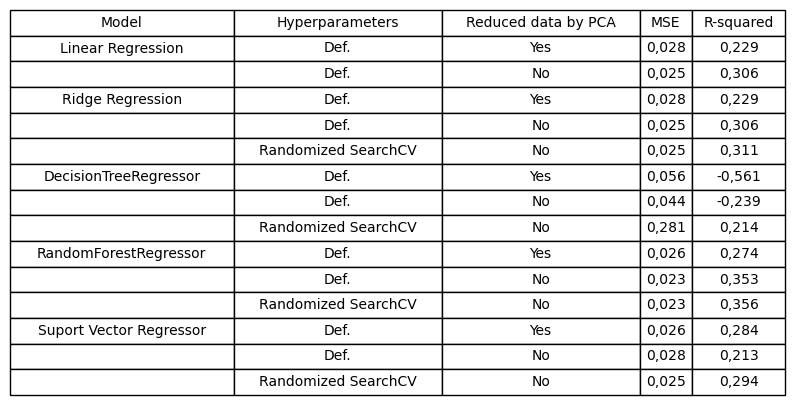

In [ ]:
# Data for the table
data = {
    "Model": [
        "Linear Regression", "", "Ridge Regression", "", "", "DecisionTreeRegressor", "", "",
        "RandomForestRegressor", "", "", "Suport Vector Regressor", "", ""
    ],
    "Hyperparameters": [
        "Def.", "Def.", "Def.", "Def.", "Randomized SearchCV", "Def.", "Def.", "Randomized SearchCV",
        "Def.", "Def.", "Randomized SearchCV", "Def.", "Def.", "Randomized SearchCV"
    ],
    "Reduced data by PCA": [
        "Yes", "No", "Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No"
    ],
    "MSE": [
        "0,028", "0,025", "0,028", "0,025", "0,025", "0,056", "0,044", "0,281",
        "0,026", "0,023", "0,023", "0,026", "0,028", "0,025"
    ],
    "R-squared": [
        "0,229", "0,306", "0,229", "0,306", "0,311", "-0,561", "-0,239", "0,214",
        "0,274", "0,353", "0,356", "0,284", "0,213", "0,294"
    ]
}


df = pd.DataFrame(data)

# Create a visual table
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.axis('off')  
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1] 
)
table.auto_set_font_size(False)
table.set_fontsize(10)  
table.auto_set_column_width(col=list(range(len(df.columns))))  

plt.show()


**All models showed better results when trained with the original data rather than with the data reduced by PCA**, which makes sense given the nature of our data. Although the PCA performed explains 95% of the data variability, the remaining 5% may include relevant information contained in the embeddings. Furthermore, the data transformed into embeddings is already in a reduced vector space, which by itself contributes to better performance.

Another common aspect across all attempts was that **hyperparameter optimization with RandomizedSearchCV improved the performance of all models**. This highlights the importance of optimization in the ML process.

**The most promising model was the RandomForestRegressor**, using the original data and performing hyperparameter optimization with RandomizedSearchCV. We obtained an MSE of 0.023, which means that the model's predictions are close to the actual values. However, an R² of 0.356 tells us that the model explains only 35.6% of the data variability, suggesting that there is space for improvements in the model.

The **limitation of computational resources** was the main obstacle, making it difficult to efficiently process the volume and complexity of our data. This limitation affected the ability to fully explore the potential of the models, especially considering the size and nature of our data.

### Traceback on the Best Model: RFR with original data and hyperparameter optimization 

To verify the accuracy of the entire architecture developed to date, we decided to perform a traceback based on the predictions obtained from the most promising model (RF with the original data and hyperparameter optimization):

In [32]:
X_test_embeddings = pd.DataFrame(X_test_embeddings)

# Convert predictions into a DataFrame for tracking
predictions_with_indices = pd.DataFrame({
    'Index': X_test_embeddings.index,  # Original indices of the test set samples
    'Prediction': y_test_rf_pred
})

# Display the first predictions and corresponding indices
print("Predictions with corresponding indices:")
print(predictions_with_indices.head())

# To access the sample corresponding to the first prediction
first_prediction_index = predictions_with_indices.iloc[0]['Index']
first_prediction_sample = X_test_embeddings.loc[first_prediction_index]
print("\nSample corresponding to the first prediction:")
print(first_prediction_sample)

Predictions with corresponding indices:
   Index  Prediction
0      0    0.044039
1      1    0.004283
2      2    0.039293
3      3    0.121634
4      4    0.001997

Sample corresponding to the first prediction:
0      0.600617
1      1.000000
2      0.937280
3      0.593431
4      0.733264
         ...   
863    0.908930
864    0.928018
865    0.894949
866    0.875315
867    0.897640
Name: 0, Length: 868, dtype: float64


In [33]:
sequence_embedding_size = 100 
description_embedding_size = 768 

# The concatenated sample
first_prediction_sample = X_test_embeddings.loc[first_prediction_index]

# Splitting the concatenated vector
sequence_embedding = first_prediction_sample[:sequence_embedding_size]
description_embedding = first_prediction_sample[sequence_embedding_size:sequence_embedding_size + description_embedding_size]

# Results
print("Seq_Embedding:")
print(sequence_embedding)

print("\nDisease_Embedding:")
print(description_embedding)

# Converting to a numpy array
seq_embedding_array = np.array(sequence_embedding)
print(seq_embedding_array)

Seq_Embedding:
0     0.600617
1     1.000000
2     0.937280
3     0.593431
4     0.733264
        ...   
95    0.900016
96    0.550640
97    0.540475
98    0.492537
99    0.886927
Name: 0, Length: 100, dtype: float64

Disease_Embedding:
100    0.887657
101    0.895884
102    0.901867
103    0.911851
104    0.943052
         ...   
863    0.908930
864    0.928018
865    0.894949
866    0.875315
867    0.897640
Name: 0, Length: 768, dtype: float64
[0.60061694 1.         0.93728036 0.59343133 0.73326406 0.44914207
 0.80775624 0.71145573 0.20036893 0.5389044  0.61077951 0.
 0.32006702 0.63643215 0.72958094 0.50567796 0.26356532 0.12478308
 0.97180218 0.78222241 0.74794349 0.36704654 0.87191959 0.9406655
 0.78470757 0.55019894 0.77169862 0.80249361 0.5100263  0.54614535
 0.93149031 0.57769422 0.21875122 0.65941125 0.7272266  0.76683874
 0.73563906 0.84421358 0.81861089 0.47160895 0.52985997 0.56515253
 0.24903848 0.27112579 0.40397426 0.28459349 0.35085278 0.4510008
 0.91839168 0.69109449 0

In [34]:
# Load the dataset to make matches
final_df = pd.read_csv("final_df.csv")

In [35]:
# Check the data type of the 'Seq_Embedding' column in the DataFrame
print(final_df['Seq_Embedding'].dtype)

# Check the type of the variable
print(type(seq_embedding_array))

# Function to convert the string (if necessary) into a NumPy array
def string_to_numpy_array(embedding_str):
    if isinstance(embedding_str, str):
        embedding_str = embedding_str.strip('[]')
        embedding_list = [float(x) for x in embedding_str.split()]
        return np.array(embedding_list)
    elif isinstance(embedding_str, list):
        return np.array(embedding_str)
    else:
        return None

# Apply the function to the entire 'Seq_Embedding' column to convert it to NumPy arrays
final_df['Seq_Embedding'] = final_df['Seq_Embedding'].apply(string_to_numpy_array)

# Check the first row to confirm the conversion
print(final_df['Seq_Embedding'].iloc[0])

object
<class 'numpy.ndarray'>
[0.58223012 0.98432244 0.92557997 0.5781199  0.77852775 0.41574703
 0.85723319 0.78750636 0.16360372 0.63647483 0.71071066 0.
 0.33855058 0.61761642 0.67568466 0.55627538 0.21568417 0.00416352
 0.84567607 0.75585179 0.76172631 0.3328423  0.90262807 0.97004224
 0.83692363 0.57245685 0.64729312 0.92753008 0.41468335 0.54486189
 0.9033699  0.59649707 0.30072123 0.58139266 0.68944059 0.81938724
 0.65154822 0.8383773  0.77820441 0.42812597 0.5055856  0.53427547
 0.29412247 0.28623591 0.5140812  0.41171032 0.35019957 0.42294027
 0.84522316 0.69397471 0.50992355 0.40915803 0.35177808 0.48112369
 0.07294632 0.8393323  0.75812615 0.5795946  0.04943262 0.66404825
 0.68046682 0.72393774 0.50395933 0.74736776 0.67405013 0.73917247
 0.55925563 0.25434848 0.54099122 0.47465629 0.50274312 0.86632513
 0.52061866 0.11138073 0.46393832 0.53934314 0.42436412 0.54602791
 0.42684315 0.71480861 0.43793627 0.32269537 0.85189411 0.45199998
 0.25384112 0.86151351 0.63828652 0.434

In [36]:
# Function to compare embeddings
def is_matching_embedding(row_embedding, target_embedding, tolerance=1e-6):
    return np.allclose(row_embedding, target_embedding, atol=tolerance)

# Search for the row where the embedding matches
matching_row = final_df[final_df['Seq_Embedding'].apply(lambda x: is_matching_embedding(np.array(x), seq_embedding_array))]

# Display the matching row
if not matching_row.empty:
    print("Matching row found:")
    print(matching_row)
else:
    print("No matching row found.")

# Access the Gene_ID from the found row
matching_gene_id = matching_row['Gene_ID'].values[0]
print(f"Corresponding Gene_ID: {matching_gene_id}")

Matching row found:
       Gene_ID                          Disease  \
42741    23237  Alcoholic Intoxication, Chronic   
42742    23237              Alzheimer's Disease   
42743    23237               Presenile dementia   
42744    23237               Movement Disorders   
42745    23237                    Schizophrenia   
42746    23237        Cocaine-Related Disorders   
42747    23237               Cocaine Dependence   

                                       Disease_Embedding  \
42741  [0.88765714 0.89588396 0.90186702 0.91185077 0...   
42742  [0.90225344 0.88881582 0.89399212 0.91228476 0...   
42743  [0.88421375 0.88678713 0.90185071 0.91114427 0...   
42744  [0.88927211 0.92486154 0.8865273  0.88912351 0...   
42745  [0.90579451 0.92227764 0.94480602 0.92059937 0...   
42746  [0.90049218 0.92263105 0.92483915 0.91025301 0...   
42747  [0.90432645 0.90552692 0.91940348 0.91358728 0...   

                                           Seq_Embedding         Y  
42741  [0.60061694, 1

As an example, we analyze the value of the first prediction made by the model, which was 0.044. From this, we investigated which sample it corresponded to. Since the samples had been concatenated, we reversed this process to obtain the embeddings of the sequences and diseases separately. This allowed us to locate them in our dataset "final_df" and identify the corresponding Gene_ID and disease.

We found that the sample corresponded to the gene with ID 23237, which is associated with the Cytoskeleton-Associated Protein Regulated by Activity. This Gene_ID appears 7 times in our dataset and is linked to 7 different diseases, all within the psychiatric conditions spectrum. Furthermore, we observed that the embeddings generated for these diseases are very similar, grouping them in a vector space based on their similarity, which confirms the effectiveness of our preprocessing.

A brief review of the literature revealed that some studies suggest that this protein may play a significant role in vulnerability to addiction, acting as a regulator of drug intake. [6]

Additionally, other studies highlight its role in regulating behaviors related to mood and anxiety. Specifically for the sample under analysis, which corresponds to chronic alcoholism, some studies indicate that targeting this protein during exposure to alcohol-related stimuli may represent a new, selective mechanism for preventing relapse. [7]

## References

[1] L. Davies, “An approximation based theory to linear regression,” 2024.

[2] T. Hastie, R. Tibshirani, and J. Friedman, “The elements of statistical learning,” 2009.

[3] S. Han, B. D. Williamson, and Y. Fong, “Improving random forest predictions in small datasets fromtwo-phase sampling designs,” BMC Medical Informatics and Decision Making, vol. 21, pp. 1–9, 12 2021.

[4] Fernández-Delgado, M., Cernadas, E., Barro, S., & Amorim, R. (2014). Do we need hundreds of classifiers to solve real-world classification problems? Journal of Machine Learning Research, 15(1), 3133-3181.

[5] Ibrahim, Karim & Huang, Yuk & Ali Najah Ahmed, Al-Mahfoodh & Chai-Hoon, Charlene KOO & El-Shafie, Ahmed. (2022). Forecasting multi-step-ahead reservoir monthly and daily inflow using machine learning models based on different scenarios. Applied Intelligence. 53. 10.1007/s10489-022-04029-7.

[6] Penrod, R. D., Thomsen, M., Taniguchi, M., Guo, Y., Cowan, C. W., & Smith, L. N. (2020). The activity-regulated cytoskeleton-associated protein, Arc/Arg3.1, influences mouse cocaine self-administration. Pharmacology, Biochemistry, and Behavior, 188, 172818. https://doi.org/10.1016/j.pbb.2019.172818

[7] Pagano, R., Salamian, A., Zielinski, J., Beroun, A., Nalberczak-Skóra, M., Skonieczna, E., Cały, A., Tay, N., Banaschewski, T., Desrivières, S., Grigis, A., Garavan, H., Heinz, A., Brühl, R., Martinot, J.-L., Martinot, M.-L. P., Artiges, E., Nees, F., Orfanos, D. P., & Poustka, L. (2022). Arc controls alcohol cue relapse by a central amygdala mechanism. Molecular Psychiatry. https://doi.org/10.1038/s41380-022-01849-4